<a href="https://colab.research.google.com/github/ijinshes2ly/Decision_tree/blob/main/GM_D25_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.8 MB/s eta 0:00:00
모델 정확도: 0.95
분류 보고서:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



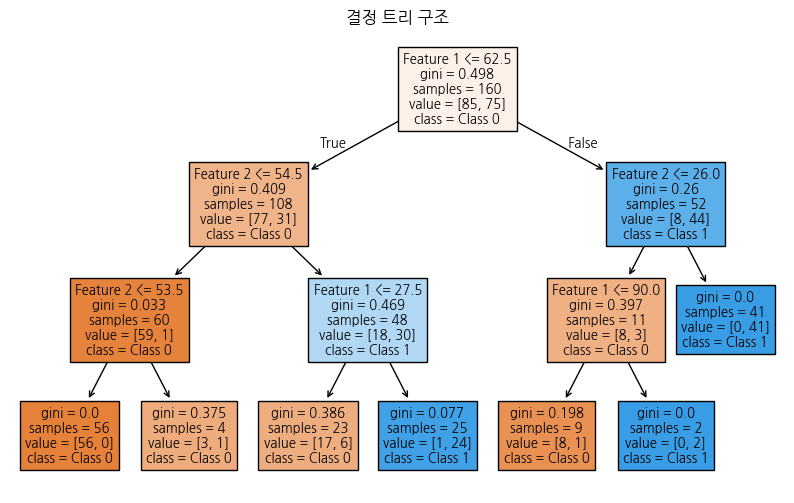

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 데이터 생성
np.random.seed(42)
n_samples = 200
X1 = np.random.randint(1, 100, n_samples)  # Feature 1
X2 = np.random.randint(1, 100, n_samples)  # Feature 2
y = (X1 + X2 > 100).astype(int)  # 단순한 이진 분류 기준

df = pd.DataFrame({"Feature 1": X1, "Feature 2": X2, "Label": y})

# 데이터 분리
X = df[["Feature 1", "Feature 2"]]
y = df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"모델 정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))

# 트리 시각화
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], filled=True)
plt.title("결정 트리 구조")
plt.show()


피쳐1의 임계값은 62.5 로 작거나 같으면 트루임. 지니계수가 0.498로 0.5에 매우 가까워 불순도가 높음.해당 노드에 160개의 데이터 포인트가 존재함.클래스 0은 85개, 클래스1은 75개 있음.

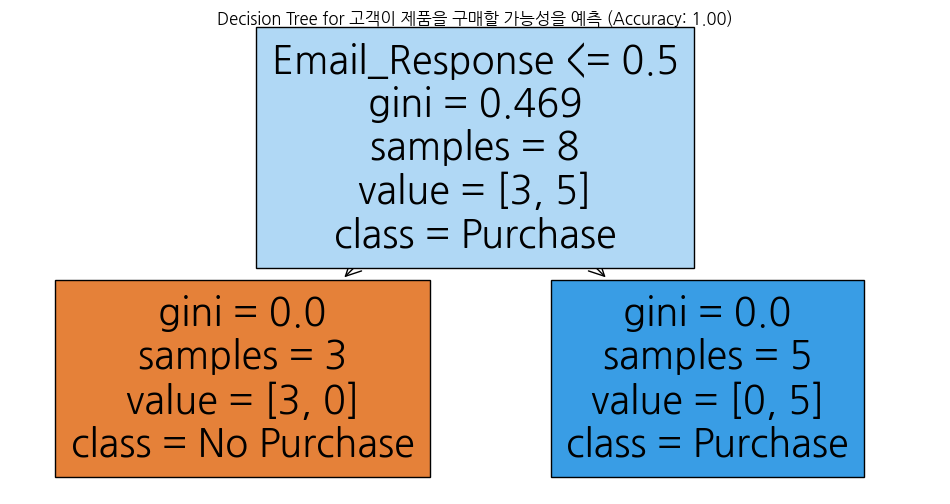

예측 결과: 구매할 가능성이 높음


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. 가상의 고객 데이터 생성 (하드코딩된 값 사용)
data = {
    "Frequency": [3, 10, 5, 8, 1, 12, 4, 7, 6, 2],
    "Avg_Purchase_Amount": [30, 120, 80, 150, 10, 200, 50, 100, 90, 20],
    "Email_Response": [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    "Social_Media_Activity": [2, 8, 4, 7, 0, 10, 3, 6, 5, 1],
    "Purchase": [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]  # 타겟 변수 (1: 구매, 0: 구매 안 함)
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 2. 입력(X)과 타겟(y) 분리
X = df.drop(columns=["Purchase"])  # 독립변수
y = df["Purchase"]  # 종속변수 (목표 예측값)

# 3. 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 의사결정트리 모델 학습
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# 5. 모델 예측
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 6. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Purchase", "Purchase"], filled=True, ax=ax)
plt.title(f"Decision Tree for 고객이 제품을 구매할 가능성을 예측 (Accuracy: {accuracy:.2f})")
plt.show()

# 7. 고객 데이터 입력 후 구매 예측 함수 (Feature Name 문제 해결)
def predict_purchase(Frequency, Avg_Purchase_Amount, Email_Response, Social_Media_Activity):
    """
    입력한 고객 데이터를 기반으로 구매 여부를 예측하는 함수
    """
    # 입력 데이터를 DataFrame 형태로 변환하여 Feature Names 유지
    input_data = pd.DataFrame([[Frequency, Avg_Purchase_Amount, Email_Response, Social_Media_Activity]],
                              columns=X.columns)

    prediction = dt_model.predict(input_data)
    return "구매할 가능성이 높음" if prediction[0] == 1 else "구매하지 않을 가능성이 높음"

# 8. 예제 입력 데이터 (사용자가 예측하고 싶은 값)
example_input = {
    "Frequency": 5,  # 웹사이트 방문 횟수
    "Avg_Purchase_Amount": 90,  # 평균 구매 금액
    "Email_Response": 1,  # 이메일 캠페인 반응 여부 (1: 반응, 0: 반응 없음)
    "Social_Media_Activity": 4  # 소셜 미디어 활동 횟수
}

# 9. 예측 실행
prediction_result = predict_purchase(**example_input)
print(f"예측 결과: {prediction_result}")


파라미터 설명:
dt_model: 학습된 결정 트리 모델을 입력합니다. 예를 들어, DecisionTreeClassifier로 학습한 모델입니다.
feature_names=X.columns: 트리에서 사용된 특징들의 이름을 제공합니다. 여기서는 X.columns로 입력된 피처들의 이름을 사용합니다.
class_names=["No Purchase", "Purchase"]: 클래스 이름을 지정합니다. 예를 들어, 이진 분류의 경우 **"No Purchase"**와 **"Purchase"**라는 클래스 레이블을 지정합니다.
filled=True: 각 노드를 색상으로 채울지 여부를 설정합니다. True로 설정하면 각 노드의 색상이 불순도에 따라 색칠되어 가독성이 높아집니다.
ax=ax: Matplotlib의 axes 객체를 제공하여, 그래프를 특정 위치에 그릴 수 있게 합니다. 만약 여러 개의 그래프를 그리거나 서브플롯을 사용하는 경우 유용합니다.

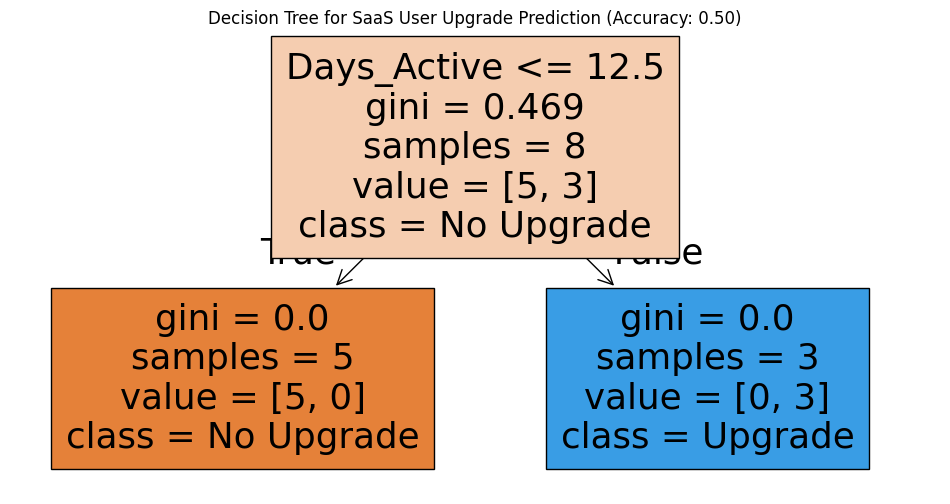

예측 결과: 무료 체험 유지 가능성이 높음


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. 가상의 고객 데이터 생성
data = {
    "Days_Active": [5, 20, 10, 15, 3, 25, 8, 18, 12, 7],
    "Features_Used": [2, 8, 5, 7, 1, 10, 3, 6, 6, 2],
    "Support_Tickets": [0, 2, 1, 3, 0, 4, 0, 2, 1, 0],
    "Added_Team_Member": [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    "Upgrade": [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]  # 1: 유료 플랜 전환, 0: 무료 체험 유지
}

# 2. 데이터프레임 생성
df = pd.DataFrame(data)

# 3. 입력(X)과 타겟(y) 분리
X = df.drop(columns=["Upgrade"])
y = df["Upgrade"]

# 4. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 의사결정트리 모델 학습
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# 6. 모델 예측 및 정확도 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 7. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Upgrade", "Upgrade"], filled=True, ax=ax)
plt.title(f"Decision Tree for SaaS User Upgrade Prediction (Accuracy: {accuracy:.2f})")
plt.show()

# 8. 유료 플랜 전환 예측 함수
def predict_upgrade(Days_Active, Features_Used, Support_Tickets, Added_Team_Member):
    input_data = pd.DataFrame([[Days_Active, Features_Used, Support_Tickets, Added_Team_Member]],
                              columns=X.columns)
    prediction = dt_model.predict(input_data)
    return "유료 플랜으로 전환할 가능성이 높음" if prediction[0] == 1 else "무료 체험 유지 가능성이 높음"

# 9. 예제 입력 데이터 및 예측 실행
example_input = {"Days_Active": 10, "Features_Used": 5, "Support_Tickets": 1, "Added_Team_Member": 1}
prediction_result = predict_upgrade(**example_input)
print(f"예측 결과: {prediction_result}")


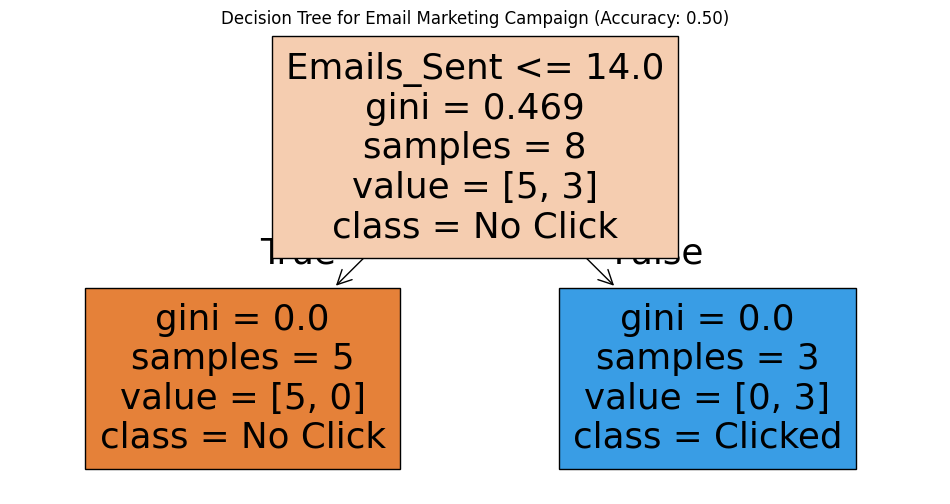

예측 결과: 이메일을 클릭하지 않을 가능성이 높음


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. 가상의 고객 데이터 생성
data = {
    "Emails_Sent": [5, 15, 10, 20, 3, 25, 8, 18, 12, 7],
    "Email_Clicks": [1, 5, 2, 7, 0, 10, 1, 6, 4, 2],
    "Website_Visits": [3, 10, 5, 12, 1, 15, 4, 8, 6, 3],
    "Used_Discount_Code": [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    "Clicked_Email": [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]  # 1: 클릭, 0: 클릭 안 함
}

# 2. 데이터프레임 생성
df = pd.DataFrame(data)

# 3. 입력(X)과 타겟(y) 분리
X= df.drop(columns=["Clicked_Email"])
y=df["Clicked_Email"]

# 4. 데이터 분할 (훈련 80%, 테스트 20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#5. 의사결정트리 모델 학습
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train,y_train)

#6. 모델예측 및 정확도 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

#7.결정 트리 시각화
fig, ax = plt.subplots(figsize = (12,6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Click", "Clicked"], filled=True, ax=ax)
plt.title(f"Decision Tree for Email Marketing Campaign (Accuracy: {accuracy:.2f})")
plt.show()

# 8. 이메일 클릭 예측 함수
def predict_email_click(Emails_Sent, Email_Clicks, Website_Visits, Used_Discount_Code):
    input_data = pd.DataFrame([[Emails_Sent, Email_Clicks, Website_Visits, Used_Discount_Code]],
                              columns=X.columns)
    prediction = dt_model.predict(input_data)
    return "이메일을 클릭할 가능성이 높음" if prediction[0] == 1 else "이메일을 클릭하지 않을 가능성이 높음"

# 9. 예제 입력 데이터 및 예측 실행
example_input = {"Emails_Sent": 10, "Email_Clicks": 2, "Website_Visits": 5, "Used_Discount_Code": 0}
prediction_result = predict_email_click(**example_input)
print(f"예측 결과: {prediction_result}")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.3 MB/s eta 0:00:00
Mean Absolute Error (MAE): 4538.25
R² Score: 0.98


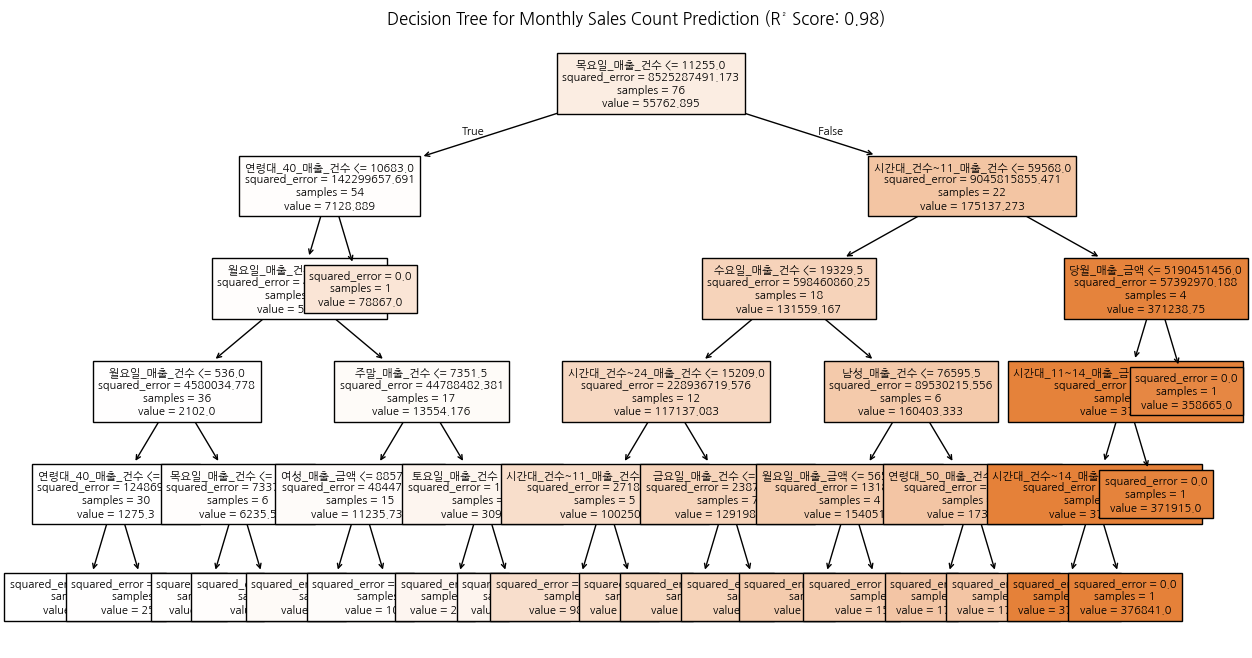

예상 당월 매출 건수: 511 건


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib
#결정트리 회귀 모델
#1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "사가정역" 데이터 필터링
df = df[df["상권_코드_명"] == "사가정역"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]  # 분석에 필요 없는 컬럼 제거
df = df.drop(columns=drop_columns)

# 4. 결측값 제거
df = df.dropna()

# 5. 입력(X)과 타겟(y) 분리
X = df.drop(columns=["당월_매출_건수"])  # 입력 변수 (매출 건수를 예측해야 하므로 제외)
y = df["당월_매출_건수"]  # 타겟 변수 (예측 대상)

# 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 결정트리 회귀 모델 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 8. 모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"Decision Tree for Monthly Sales Count Prediction (R² Score: {r2:.2f})")
plt.show()

# 10. 예측 함수
def predict_sales_count(data_input):
    input_data = pd.DataFrame([data_input], columns=X.columns)
    prediction = dt_model.predict(input_data)
    return f"예상 당월 매출 건수: {prediction[0]:,.0f} 건"

# 예측 예시
sample_input = X.iloc[0].values  # 첫 번째 샘플 데이터로 예측
print(predict_sales_count(sample_input))


Mean Absolute Error (MAE): 456482747.08
R² Score: 0.98


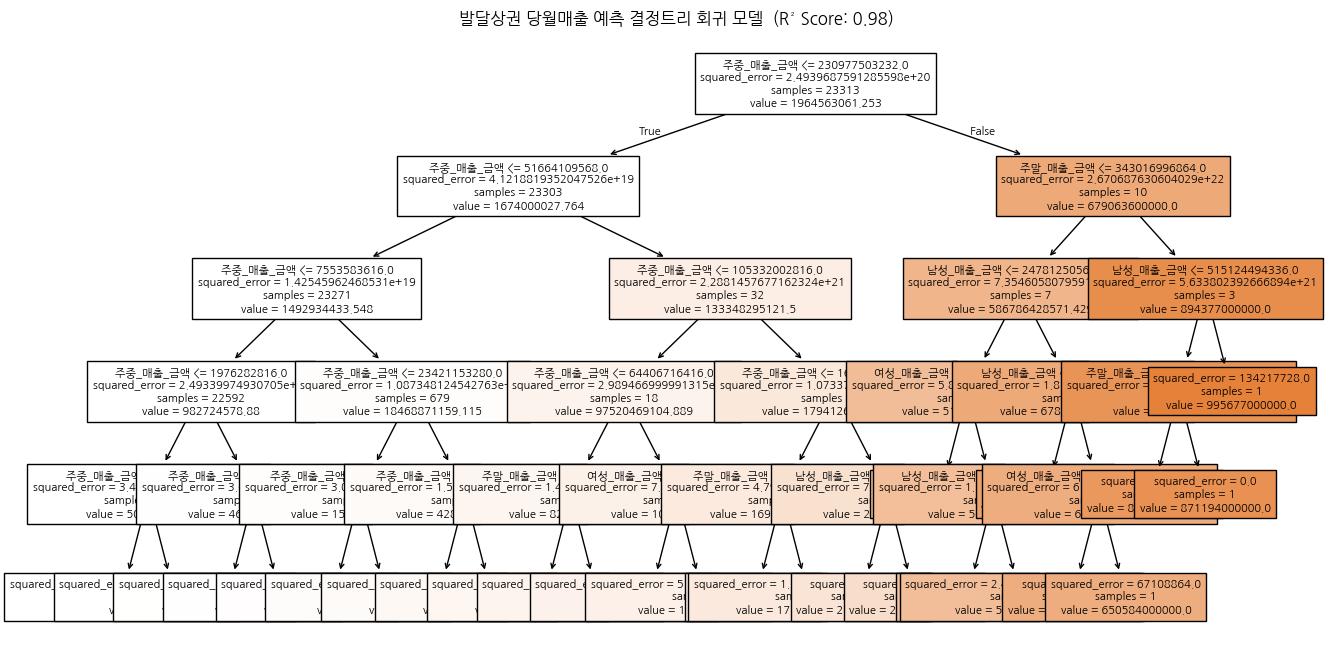

In [22]:
#문제 1. 서울시 상권분석 데이터셋을 이용하여 발달상권의 당월 매출금액을 예측하는 예측모델을 개발하세요
#결정트리 알고리즘을 사용해서 예측모델을 만드세요.
#예측정확도를 90% 이상 충족하고
#위 예측모델을 만들기 위한 독립변수를 제시하세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

df= pd.read_csv("서울시_상권분석_데이터.csv")
df = df.dropna()
#데이터셋 분리
df_developed= df.loc[df["상권_구분_코드_명"] == "발달상권"]
X=df_developed[['여성_매출_금액', '남성_매출_금액','주중_매출_금액','주말_매출_금액']]
y=df_developed["당월_매출_금액"]

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#결정트리 회귀 모델 생성 및 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"발달상권 당월매출 예측 결정트리 회귀 모델  (R² Score: {r2:.2f})")
plt.show()

In [9]:
#문제 2. 미아사거리의 주중 매출액을 예측하는 모델을 개발하세요. 조건은 1번과 같습니다.
#미아사거리 주중매출액과 상관관계 높은 컬럼찾기: 독립변수 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

# 1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "미아사거리" 데이터 필터링
df_filtered= df.loc[df["상권_코드_명"] == "미아사거리"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]
df_filtered = df_filtered.drop(columns=drop_columns)  # 불필요한 컬럼 제거(범주형)

# 4.미아사거리 주중매출 금액과 상관관계 높은 컬럼 구하기
correlation_matrix = df_filtered.corr()

#5.미아사거리 주중 매출과 상관관계가 높은 상위 5개 변수 추출
independent_variables = correlation_matrix["주중_매출_금액"].drop("주중_매출_금액").sort_values(ascending=False).head(5)
print(independent_variables)

당월_매출_금액        0.989689
여성_매출_금액        0.960585
금요일_매출_금액       0.959291
화요일_매출_금액       0.956393
연령대_50_매출_금액    0.952604
Name: 주중_매출_금액, dtype: float64


Mean Absolute Error (MAE): 54606941.37
R² Score: 0.99


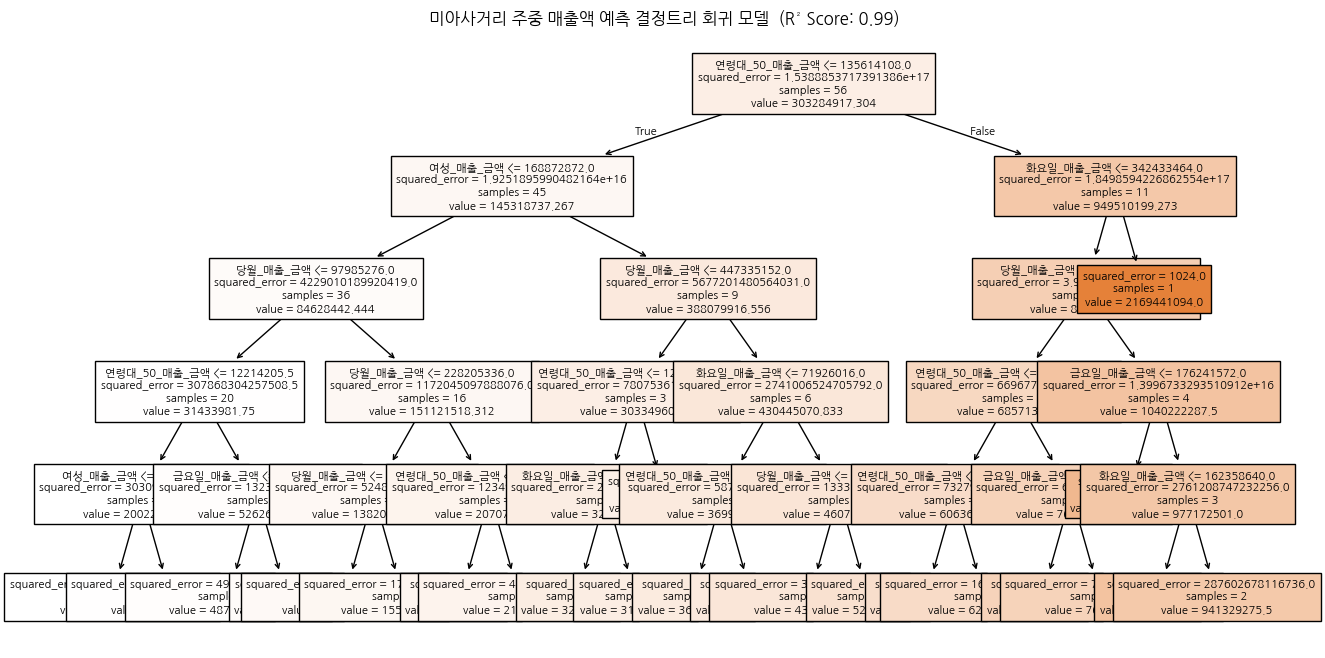

In [37]:
df_filtered = df_filtered.dropna()
6.#데이터셋 분리
df_developed= df.loc[df["상권_코드_명"] == "미아사거리"]
X=df_developed[['당월_매출_금액', '여성_매출_금액','금요일_매출_금액','화요일_매출_금액','연령대_50_매출_금액']]
y=df_developed["주중_매출_금액"]

#7. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#8.결정트리 회귀 모델 생성 및 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

#9.모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 10. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"미아사거리 주중 매출액 예측 결정트리 회귀 모델  (R² Score: {r2:.2f})")
plt.show()

독립변수 설정 기준: 미아사거리 주중 매출금액과 상관관계 높은 상위 5개 컬럼.
'당월_매출_금액',
'여성_매출_금액',
'금요일_매출_금액',
'화요일_매출_금액',
'연령대_50_매출_금액'

In [39]:
#문제 3. 특정상권내 특정 조건 매출 예측
#발달상권 내 당구장의 시간대_21~24_매출_금액 예측
#발달상권 내 당구장의 21-24매출 금액과 상관관계 높은 컬럼 찾기: 독립변수 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

# 1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "발달상권 내 당구장" 데이터 필터링
df_filtered= df.loc[df["상권_구분_코드_명"] == "발달상권"]
df_filtered2=df_filtered.loc[df_filtered["서비스_업종_코드_명"]=="당구장"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]
df_filtered2 = df_filtered2.drop(columns=drop_columns)  # 불필요한 컬럼 제거

# 4.발달상권 내 당구장 시간대_21~24_매출_금액과 상관관계 높은 컬럼 구하기
correlation_matrix = df_filtered2.corr()

#5.미아사거리 주중 매출과 상관관계가 높은 상위 5개 변수 추출
independent_variables = correlation_matrix["시간대_21~24_매출_금액"].drop("시간대_21~24_매출_금액").sort_values(ascending=False).head(5)
print(independent_variables)

당월_매출_금액           0.888455
주중_매출_금액           0.872763
남성_매출_금액           0.872546
시간대_건수~24_매출_건수    0.851486
금요일_매출_금액          0.850513
Name: 시간대_21~24_매출_금액, dtype: float64


In [ ]:
df_filtered2 = df_filtered2.dropna()
6.#데이터셋 분리
X=df_developed[['당월_매출_금액', '여성_매출_금액','금요일_매출_금액','화요일_매출_금액','연령대_50_매출_금액']]
y=df_developed["주중_매출_금액"]

#7. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#8.결정트리 회귀 모델 생성 및 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

#9.모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 10. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"미아사거리 주중 매출액 예측 결정트리 회귀 모델  (R² Score: {r2:.2f})")
plt.show()